In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Scrapping import BeautifulSoupScrape as BSC
from datetime import datetime, timedelta
import time
import json

In [2]:
corona_ratio_data = '..\\corona_lb_ratios.csv'

pd.set_option('display.max_rows', 255)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
df = pd.read_csv(corona_ratio_data, header=0)
df.head()

date  year  month  day  new_cases  new_deaths  prev_cases  prev_deaths  \
0  2/1/2020  2020      2    1          0           0           0            0   
1  2/2/2020  2020      2    2          0           0           0            0   
2  2/3/2020  2020      2    3          0           0           0            0   
3  2/4/2020  2020      2    4          0           0           0            0   
4  2/5/2020  2020      2    5          0           0           0            0   

   total_cases  total_deaths  month_avg_ratio  cumulative_avg_ratio  \
0            0             0             -1.0                  -1.0   
1            0             0             -1.0                  -1.0   
2            0             0             -1.0                  -1.0   
3            0             0             -1.0                  -1.0   
4            0             0             -1.0                  -1.0   

   diff_avg_ratio  simple_ratio  
0        0.226023     -0.061092  
1        0.226023     -0.061092  
2        0.226023     -0.061092  
3        0.226023     -0.061092  
4        0.226023     -0.061092

In [4]:
x = df.month.map(str) + '_' + df.day.map(str)
y = df.diff_avg_ratio

zero = [0 for _ in range(len(x))]

max_value = df.diff_avg_ratio.max()
maximum = [max_value for _ in range(len(x))]

min_value = df.diff_avg_ratio.min()
minimum = [min_value for _ in range(len(x))]

std_value = df.diff_avg_ratio.std()
pos_std = [std_value for _ in range(len(x))]
neg_std = [-std_value for _ in range(len(x))]

In [5]:
hotspots_data = []
hotspots = []

for index, row in df.iterrows():
    # negative hotspots
    if row.diff_avg_ratio <= -std_value:
        hotspots_data.append({
            'date': row.date,
            'prev_cases': row.prev_cases,
            'new_cases': row.new_cases,
            'cases_diff': abs(row.new_cases - row.prev_cases),
            'prev_deaths': row.prev_deaths,
            'new_deaths': row.new_deaths,
            'death_diff': abs(row.new_deaths - row.prev_deaths),
            'ratio': row.diff_avg_ratio
        })
        hotspots.append(row.diff_avg_ratio)
        
    else:
        hotspots.append(0)
        
    
print(len(hotspots_data), 'negative hotspots')
print(len(hotspots), '_spots')

12 negative hotspots
232 _spots


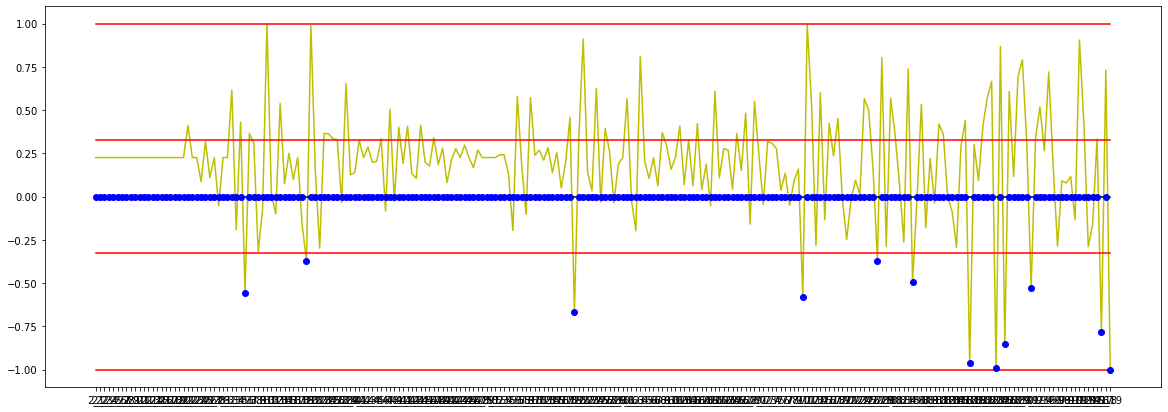

In [6]:
plt.figure(figsize=(20, 7))
plt.plot(
    x, y, 'y', 
    x, zero, 'black',
    x, maximum, 'r', 
    x, minimum, 'r', 
    x, pos_std, 'r',
    x, neg_std, 'r',
    x, hotspots, 'bo'
)

In [7]:
def get_trends(dates):
    final_trends = []
    
    for date in dates:
        # get trends
        trends = BSC.get_elements(
            "div.col-lg-8 > div > ul > li > a",
            source=f'https://trendogate.com/placebydate/23424873/{date}',
            attributes=True
        )
        # get trends data
        for trend in trends:
            final_trends.append({
                'topic': trend['text'],
                'link': 'https://trendogate.com/' + trend['href'],
                'tweets': []
            })

        # sleep
        time.sleep(0.5)

    return final_trends

#----------------------------------------------------------------------------------------------------

def get_date_range(date):
    date = datetime.strptime(date, '%m/%d/%Y')
    day_before = date - timedelta(days=1)
    return [
        day_before.strftime('%Y-%m-%d'),
        # date.strftime('%Y-%m-%d')
    ]

#----------------------------------------------------------------------------------------------------

def get_hotspot_topics(date):
    global hotspots_topics_trends

    dates = get_date_range(date)
    trends = get_trends(dates)

    print('[Date]:', date)
    print('[Trends]:', trends)
    print('------------------------------------------')

    return trends

#----------------------------------------------------------------------------------------------------

def get_hotspots_topics(hotspots):
    hotspots_topics_trends = {}

    for hotspot in hotspots:
        hotspots_topics_trends[hotspot['date']] = {
            **hotspot,
            'trends': get_hotspot_topics(hotspot['date'])
        }

    with open('hotspots_topics_trends.json', 'w', encoding='utf-8') as f:
        f.write(json.dumps(hotspots_topics_trends, indent=2, ensure_ascii=False))
    
    print('Done!!')

In [8]:
get_hotspots_topics(hotspots_data)

[Date]: 3/6/2020
[Trends]: [{'topic': ' #lebanonprotests', 'link': 'https://trendogate.com//trend/95835855', 'tweets': []}, {'topic': ' #SaudiArabia', 'link': 'https://trendogate.com//trend/95835854', 'tweets': []}, {'topic': ' #breaking', 'link': 'https://trendogate.com//trend/95835853', 'tweets': []}, {'topic': ' #generationequality', 'link': 'https://trendogate.com//trend/95835852', 'tweets': []}, {'topic': ' #iwd2020', 'link': 'https://trendogate.com//trend/95835851', 'tweets': []}, {'topic': ' #صيدا', 'link': 'https://trendogate.com//trend/95835850', 'tweets': []}, {'topic': ' #lbcilebanon', 'link': 'https://trendogate.com//trend/95835849', 'tweets': []}, {'topic': ' #بريطانيا', 'link': 'https://trendogate.com//trend/95835848', 'tweets': []}, {'topic': ' #اردوغان', 'link': 'https://trendogate.com//trend/95835847', 'tweets': []}, {'topic': ' #gaming', 'link': 'https://trendogate.com//trend/95835846', 'tweets': []}, {'topic': ' #طرابلس', 'link': 'https://trendogate.com//trend/958358